In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

from pyod.models.lof import LOF
from pyod.models.loda import LODA
from sklearn.ensemble import IsolationForest

from sklearn.decomposition import PCA

In [7]:
artists = pd.read_csv('./dataset_preprocessed/tabular/artists.csv')
tracks = pd.read_csv('./dataset_preprocessed/tabular/tracks.csv')

# Isolating Numerical Attributes and Normalization

In [8]:
X_artists = artists.drop(columns=['id', 'name', 'genres'])
X_tracks = tracks.drop(columns=[
    'id',
    'name',
    'disc_number',
    'explicit',
    'artists',
    'album_type',
    'album_name',
    'album_release_date',
    'album_release_date_precision',
    'key',
    'mode',
    'time_signature',
    'genre'
])

In [9]:
scl = StandardScaler()
X_artists = scl.fit_transform(X_artists)
X_tracks = scl.fit_transform(X_tracks)

# Density-based

## LOF

In [5]:
clf = LOF(contamination=0.01, n_neighbors=256, metric='euclidean', n_jobs=-1)

#### Outliers in Artists

In [6]:
clf.fit(X_artists)
outliers = clf.predict(X_artists)
np.unique(outliers, return_counts=True)

(array([0, 1]), array([29835,   302]))

In [7]:
artists['lof'] = outliers

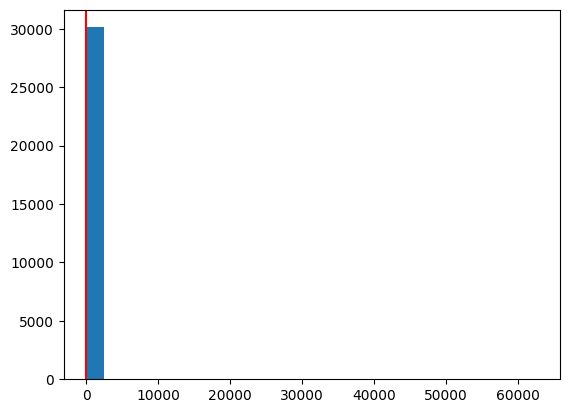

In [8]:
plt.hist(clf.decision_function(X_artists), bins=25)
plt.axvline(np.min(clf.decision_function(X_artists)[np.where(outliers==1)]), c='r')

plt.savefig('./img/Outlier Detection/LOF_artists_histogram.png', dpi=300, bbox_inches='tight')

plt.show()

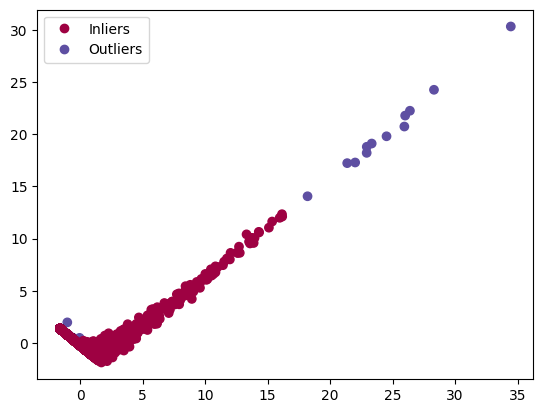

In [9]:
pca = PCA(n_components=2)
pca_data = pd.DataFrame(pca.fit_transform(X_artists), columns=['PC1', 'PC2'])
pca_data['outlier score'] = pd.Categorical(outliers)

fig = plt.figure()
ax = fig.add_subplot()

scatter = ax.scatter(pca_data['PC1'],
                     pca_data['PC2'],
                     c=pca_data['outlier score'],
                     cmap='Spectral')

handles, labels = scatter.legend_elements()
plt.legend(handles, ['Inliers', 'Outliers'], loc='upper left')

plt.savefig('./img/Outlier Detection/LOF_artists_PCA.png', dpi=300, bbox_inches='tight')

plt.show()

#### Outliers in Tracks

In [10]:
clf.fit(X_tracks)
outliers = clf.predict(X_tracks)

In [11]:
tracks['lof'] = outliers
np.unique(outliers, return_counts=True)

(array([0, 1]), array([88686,   877]))

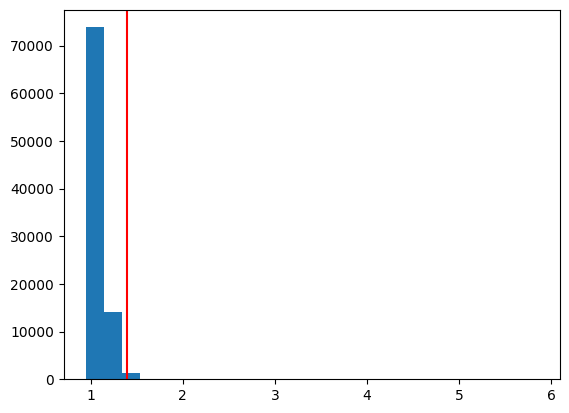

In [12]:
plt.hist(clf.decision_function(X_tracks), bins=25)
plt.axvline(np.min(clf.decision_function(X_tracks)[np.where(outliers==1)]), c='r')

plt.savefig('./img/Outlier Detection/LOF_tracks_histogram.png', dpi=300, bbox_inches='tight')

plt.show()

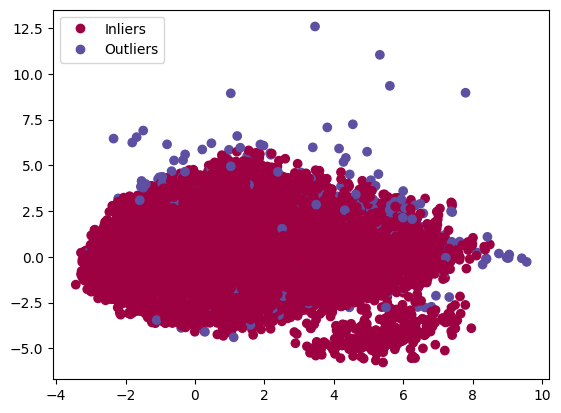

In [13]:
pca = PCA(n_components=2)
pca_data = pd.DataFrame(pca.fit_transform(X_tracks), columns=['PC1', 'PC2'])
pca_data['outlier score'] = pd.Categorical(outliers)

fig = plt.figure()
ax = fig.add_subplot()

scatter = ax.scatter(pca_data['PC1'],
                     pca_data['PC2'],
                     c=pca_data['outlier score'],
                     cmap='Spectral')

handles, labels = scatter.legend_elements()
plt.legend(handles, ['Inliers', 'Outliers'], loc='upper left')

plt.savefig('./img/Outlier Detection/LOF_tracks_PCA.png', dpi=300, bbox_inches='tight')

plt.show()

# Ensemble-based

## LODA

In [14]:
clf = LODA(contamination=0.01, n_bins='auto', n_random_cuts=500)

#### Outliers in Artists

In [15]:
clf.fit(X_artists)
outliers = clf.predict(X_artists)
np.unique(outliers, return_counts=True)

(array([0, 1]), array([29844,   293]))

In [16]:
artists['loda'] = outliers

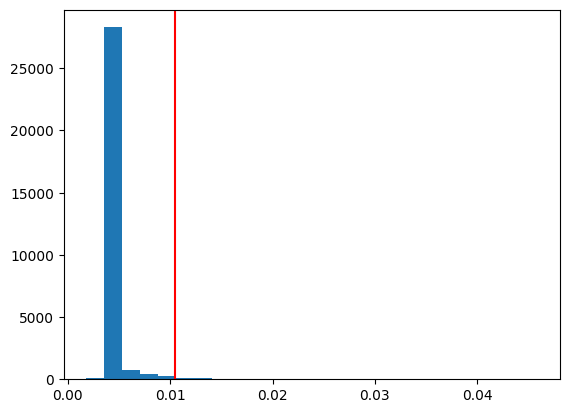

In [17]:
plt.hist(clf.decision_function(X_artists), bins=25)
plt.axvline(np.min(clf.decision_function(X_artists)[np.where(outliers==1)]), c='r')

plt.savefig('./img/Outlier Detection/LODA_artists_histogram.png', dpi=300, bbox_inches='tight')

plt.show()

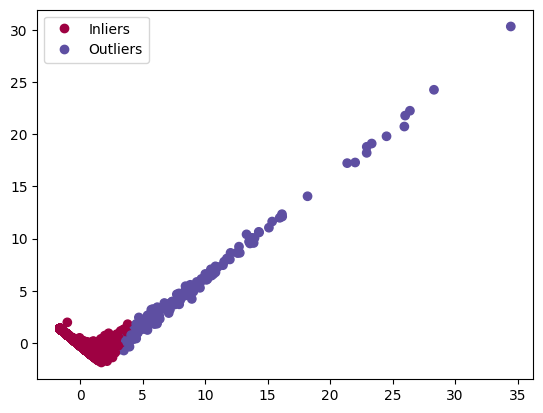

In [18]:
pca = PCA(n_components=2)
pca_data = pd.DataFrame(pca.fit_transform(X_artists), columns=['PC1', 'PC2'])
pca_data['outlier score'] = pd.Categorical(outliers)

fig = plt.figure()
ax = fig.add_subplot()

scatter = ax.scatter(pca_data['PC1'],
                     pca_data['PC2'],
                     c=pca_data['outlier score'],
                     cmap='Spectral')

handles, labels = scatter.legend_elements()
plt.legend(handles, ['Inliers', 'Outliers'], loc='upper left')

plt.savefig('./img/Outlier Detection/LODA_artists_PCA.png', dpi=300, bbox_inches='tight')

plt.show()

#### Outliers in Tracks

In [19]:
clf.fit(X_tracks)
outliers = clf.predict(X_tracks)

In [20]:
tracks['loda'] = outliers
np.unique(outliers, return_counts=True)

(array([0, 1]), array([88667,   896]))

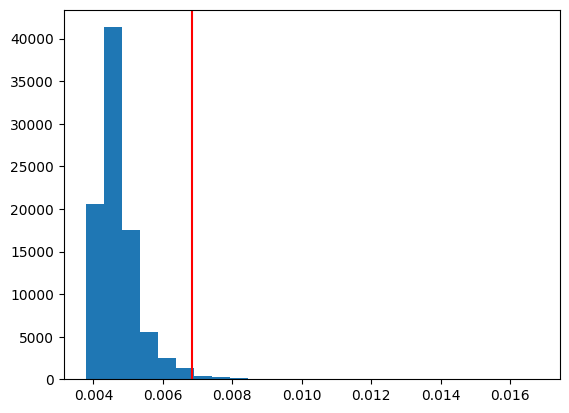

In [21]:
plt.hist(clf.decision_function(X_tracks), bins=25)
plt.axvline(np.min(clf.decision_function(X_tracks)[np.where(outliers==1)]), c='r')

plt.savefig('./img/Outlier Detection/LODA_tracks_histogram.png', dpi=300, bbox_inches='tight')

plt.show()

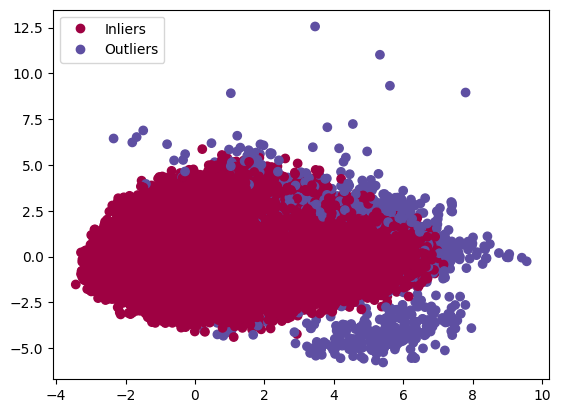

In [22]:
pca = PCA(n_components=2)
pca_data = pd.DataFrame(pca.fit_transform(X_tracks), columns=['PC1', 'PC2'])
pca_data['outlier score'] = pd.Categorical(outliers)

fig = plt.figure()
ax = fig.add_subplot()

scatter = ax.scatter(pca_data['PC1'],
                     pca_data['PC2'],
                     c=pca_data['outlier score'],
                     cmap='Spectral')

handles, labels = scatter.legend_elements()
plt.legend(handles, ['Inliers', 'Outliers'], loc='upper left')

plt.savefig('./img/Outlier Detection/LODA_tracks_PCA.png', dpi=300, bbox_inches='tight')

plt.show()

# Model-based

## Isolation Forest

In [50]:
clf = IsolationForest(random_state=42, n_estimators=100, contamination=0.01, n_jobs=-1)

#### Outliers in Artists

In [51]:
clf.fit(X_artists)
outliers = clf.predict(X_artists)

In [52]:
artists['iforest'] = outliers
# Mapping all outliers to 1 and all inliers to 0
artists['iforest'] = artists['iforest'].map({-1: 1, 1: 0})
np.unique(outliers, return_counts=True)

(array([-1,  1]), array([  302, 29835]))

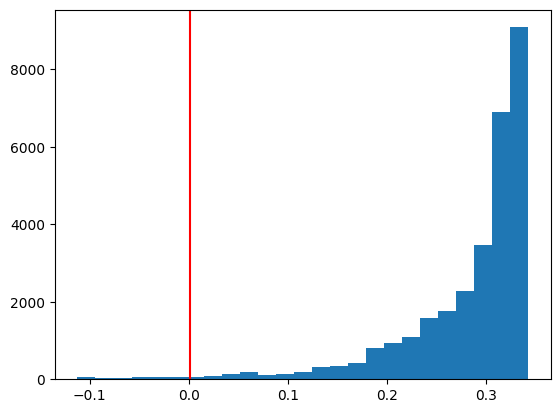

In [53]:
plt.hist(clf.decision_function(X_artists), bins=25)
plt.axvline(np.min(clf.decision_function(X_artists)[np.where(outliers==1)]), c='r')

plt.savefig('./img/Outlier Detection/IsolationForest_artists_histogram.png', dpi=300, bbox_inches='tight')

plt.show()

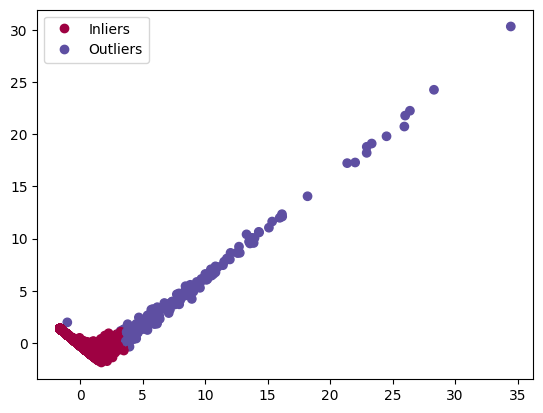

In [54]:
pca = PCA(n_components=2)
pca_data = pd.DataFrame(pca.fit_transform(X_artists), columns=['PC1', 'PC2'])
pca_data['outlier score'] = pd.Categorical(outliers)

fig = plt.figure()
ax = fig.add_subplot()

scatter = ax.scatter(pca_data['PC1'],
                     pca_data['PC2'],
                     c=pca_data['outlier score'],
                     cmap='Spectral_r')

handles, labels = scatter.legend_elements()
plt.legend(reversed(handles), ['Inliers', 'Outliers'], loc='upper left')

plt.savefig('./img/Outlier Detection/IsolationForest_artists_PCA.png', dpi=300, bbox_inches='tight')

plt.show()

#### Outliers in Tracks

In [55]:
clf.fit(X_tracks)
outliers = clf.predict(X_tracks)

In [56]:
tracks['iforest'] = outliers
# Mapping all outliers to 1 and all inliers to 0
tracks['iforest'] = tracks['iforest'].map({-1: 1, 1: 0})
np.unique(outliers, return_counts=True)

(array([-1,  1]), array([  896, 88667]))

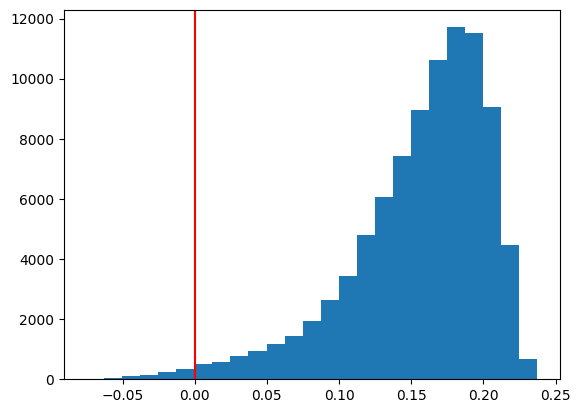

In [57]:
plt.hist(clf.decision_function(X_tracks), bins=25)
plt.axvline(np.min(clf.decision_function(X_tracks)[np.where(outliers==1)]), c='r')

plt.savefig('./img/Outlier Detection/IsolationForest_tracks_histogram.png', dpi=300, bbox_inches='tight')

plt.show()

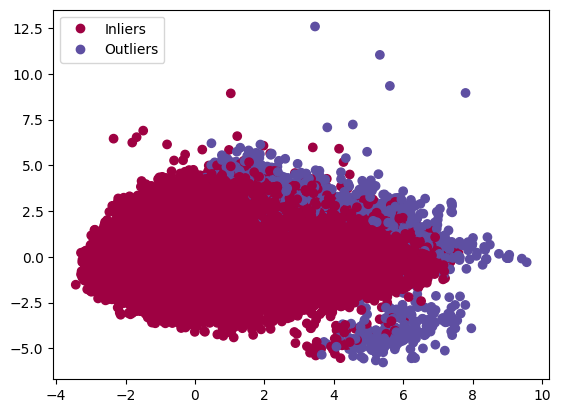

In [58]:
pca = PCA(n_components=2)
pca_data = pd.DataFrame(pca.fit_transform(X_tracks), columns=['PC1', 'PC2'])
pca_data['outlier score'] = pd.Categorical(outliers)

fig = plt.figure()
ax = fig.add_subplot()

scatter = ax.scatter(pca_data['PC1'],
                     pca_data['PC2'],
                     c=pca_data['outlier score'],
                     cmap='Spectral_r')

handles, labels = scatter.legend_elements()
plt.legend(reversed(handles), ['Inliers', 'Outliers'], loc='upper left')

plt.savefig('./img/Outlier Detection/IsolationForest_tracks_PCA.png', dpi=300, bbox_inches='tight')

plt.show()

# Comparing Outliers

Checking on how many they disagree with

In [32]:
artists.where(
    (artists['loda'] != artists['iforest']) | 
    (artists['loda'] != artists['lof']) | 
    (artists['lof'] != artists['iforest'])
    ).dropna()

,id,name,popularity,followers,genres,lof,loda,iforest
22,28Ye8SosQKDAbvMSWfE4oJ,M. Terrel,1.0,8.0,[],1.0,0.0,0.0
56,3lXvWusF04XlfRI7PYHj4P,Bernard Badie,1.0,277.0,[],1.0,0.0,0.0
264,5LHRHt1k9lMyONurDHEdrp,Tyga,78.0,6881619.0,"['hip hop', 'pop rap', 'rap', 'trap']",0.0,1.0,1.0
305,31W5EY0aAly4Qieq6OFu6I,A Boogie Wit da Hoodie,80.0,7618267.0,"['melodic rap', 'rap', 'trap']",0.0,1.0,1.0
339,2o5jDhtHVPhrJdv3cEQ99Z,Tiësto,82.0,7047988.0,"['big room', 'brostep', 'dutch edm', 'edm', 'h...",0.0,1.0,1.0
...,...,...,...,...,...,...,...,...
28450,7GTUAEg2QH41GgTmkIldjh,Miki Howard,30.0,242549.0,"['contemporary r&b', 'new jack swing', 'quiet ...",1.0,0.0,0.0
28672,73sIBHcqh3Z3NyqHKZ7FOL,Childish Gambino,76.0,11226428.0,"['atl hip hop', 'hip hop', 'rap']",0.0,1.0,1.0
28906,7u5ookLUVsuRi21ghdoqu4,Crewkid,1.0,85.0,[],1.0,0.0,0.0
28978,4xRaNqAOLDkvnMlZknaNxZ,Nina Flyer,1.0,2.0,[],1.0,0.0,0.0


In [33]:
tracks.where(
    (tracks['loda'] != tracks['iforest']) | 
    (tracks['loda'] != tracks['lof']) |
    (tracks['lof'] != tracks['iforest'])
    ).dropna()

,id,name,disc_number,duration_ms,explicit,popularity,artists,album_type,album_name,album_release_date,...,valence,tempo,time_signature,tempo_confidence,time_signature_confidence,key_confidence,genre,lof,loda,iforest
217,2mUVRJuqQDjiQHzsQrZ0mg,Don't Worry - Original,1.0,502609.0,False,0.0,Anthony Rother,album,Super Space Model,2006-06-01,...,0.888,129.965,4.0,0.941,1.000,0.667,minimal-techno,1.0,0.0,0.0
356,3UmaczJpikHgJFyBTAJVoz,Stan,1.0,404106.0,True,84.0,Eminem;Dido,album,The Marshall Mathers LP,2000-05-23,...,0.507,80.063,4.0,0.750,0.884,0.386,hip-hop,1.0,0.0,0.0
449,6cSpp45tNFg80xi4f8ZBAY,"God Is Fair, Sexy Nasty",1.0,500960.0,False,1.0,Mac Miller;Kendrick Lamar,compilation,The Hip Hop Collection,2022-10-21,...,0.137,133.701,4.0,0.080,0.930,0.511,hip-hop,1.0,0.0,0.0
633,0Nb0A0yuiYHiVyMyZm0Wh8,Super Gremlin,1.0,200547.0,True,0.0,Kodak Black,compilation,The Hip Hop Collection,2022-10-21,...,0.106,72.993,4.0,0.037,1.000,0.052,hip-hop,1.0,0.0,0.0
708,0TeH0rRFmef6eqk86MPyUA,MACHAYENGE 4,1.0,605898.0,True,50.0,Emiway Bantai,single,MACHAYENGE 4,2022-07-13,...,0.608,133.007,4.0,0.292,0.764,0.647,hip-hop,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88631,6ZI5UgjEGb82o1XaAZKLJ2,Death Rail,1.0,151112.0,False,46.0,Hi I'm Ghost,single,Death Rail,2019-11-06,...,0.112,78.616,4.0,0.000,0.932,0.340,dub,1.0,0.0,0.0
88813,39N0x2bHHkTqTUiI4iYOBl,Love Is Gone (Mixed) - Armin van Buuren Remix,1.0,81200.0,False,46.0,SLANDER;Dylan Matthew;Armin van Buuren,compilation,A State Of Trance Year Mix 2021 (Mixed by Armi...,2021-12-09,...,0.393,130.011,4.0,0.885,1.000,0.000,dub,1.0,0.0,0.0
88916,73dPS5EDSbo40IdutOvhJ6,SPARK,1.0,142400.0,False,49.0,LAYZ,single,SPARK,2022-01-28,...,0.118,149.970,4.0,0.224,0.834,0.000,dub,1.0,0.0,0.0
89249,3EEJ63VT1FN3sQod8vd4e8,(RE)EVOLUTION VOL. 2,1.0,1556883.0,False,19.0,Dirt Monkey,compilation,(RE)EVOLUTION VOL. 2,2022-06-22,...,0.329,125.065,4.0,0.007,0.797,0.434,dub,1.0,1.0,0.0


And how many they agree with

In [38]:
artists.where(
    (artists['loda'] == artists['iforest']) | 
    (artists['loda'] == artists['lof']) | 
    (artists['lof'] == artists['iforest'])
    ).dropna()

,id,name,popularity,followers,genres,lof,loda,iforest
0,19slOlozrbxkEIMD8L3Qsv,Fast Eddie,28.0,9904.0,"['acid house', 'chicago house', 'chicago rap',...",0,0,0
1,4BIamAD25vwYldaOWTEsXd,Joe Smooth,38.0,13047.0,"['chicago house', 'classic house']",0,0,0
2,0B9P7RXrukgIdmutz9XMVN,"Farley ""Jackmaster"" Funk",21.0,11933.0,"['acid house', 'chicago house', 'classic house']",0,0,0
3,09xC3MewWz48F1OpYckXTZ,Jomanda,20.0,4724.0,"['chicago house', 'garage house']",0,0,0
4,0RBnTX5xoVa1bDYt9Qbies,Floorplan,37.0,42515.0,"['chicago house', 'deep house', 'float house',...",0,0,0
...,...,...,...,...,...,...,...,...
30132,2KjxvxgJvbwweNVRMSuIRG,Hoang,49.0,22134.0,[],0,0,0
30133,6FPDULwgllPquFdqdzj5gi,Robin Hustin,45.0,14198.0,"['dutch edm', 'gaming edm']",0,0,0
30134,7CSAJPH9eLCOvPc9jn1I6e,TobiMorrow,44.0,2339.0,['sky room'],0,0,0
30135,22lnnGKlaDxk8sfzCNRJuA,Diviners,47.0,74955.0,['gaming edm'],0,0,0


In [35]:
tracks.where(
    (tracks['loda'] == tracks['iforest']) | 
    (tracks['loda'] == tracks['lof']) |
    (tracks['lof'] == tracks['iforest'])
    ).dropna()

,id,name,disc_number,duration_ms,explicit,popularity,artists,album_type,album_name,album_release_date,...,valence,tempo,time_signature,tempo_confidence,time_signature_confidence,key_confidence,genre,lof,loda,iforest
0,4rjA5kJJWbwU1prXCvg6Fk,Grey,1,290479,False,52,Kölsch,album,1989,2017-09-22,...,0.2390,186.001,3,0.020,1.000,0.500,minimal-techno,0,0,0
1,6xzpUzzIquIyUzTLbbgSdI,Thrown,1,539229,False,45,Kiasmos,album,Kiasmos,2014-10-27,...,0.1450,120.016,4,0.678,0.326,0.410,minimal-techno,0,0,0
2,56tXgHlSHCfgmGhwVXNizc,Routine,1,264200,False,39,Joris Delacroix,album,Night Visions,2018-06-22,...,0.3200,118.052,3,0.847,0.457,0.904,minimal-techno,0,0,0
3,0s3wIBczp6TdSJ2y8cveJl,Confronted - Anfisa Letyago Stranger Remix,1,387413,False,0,Pan-Pot;Anfisa Letyago,single,Confronted Remixes,2019-12-06,...,0.0374,128.990,4,0.882,0.498,0.512,minimal-techno,0,0,0
4,4PSbDDd1LRYMhqPXvza6I2,Jupiter Sunrise,1,248956,False,0,Kollektiv Turmstrasse,compilation,10 Years Diynamic,2016-09-16,...,0.1190,120.003,4,0.882,1.000,0.474,minimal-techno,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89558,0wiDjWz3U1WfwXSrWHXe2b,I'm Good (Blue) - REAPER Extended Remix,1,209655,True,23,David Guetta;Bebe Rexha;REAPER,single,I'm Good (Blue) [REAPER Remix],2022-10-21,...,0.3700,173.958,4,0.729,1.000,0.088,edm,0,0,0
89559,46n9OJc7LOIVdj8t2l5WA5,End Of The Night,1,205724,True,56,Danny Avila,single,End Of The Night,2018-11-16,...,0.3120,99.970,4,0.712,1.000,0.395,edm,0,0,0
89560,127uq83uGFapbddqiMUKky,Sexy Bitch (feat. Akon),1,195853,True,80,David Guetta;Akon,album,One More Love,2010-11-22,...,0.8010,130.011,4,0.814,0.990,0.097,edm,0,0,0
89561,0ZdUHFxifUJNqo7G4aJzoF,Savannah,1,208698,False,60,Diviners;Philly K.,single,Savannah,2015-11-25,...,0.3870,108.074,4,0.650,1.000,0.545,edm,0,0,0


# Outlier Removal

Outliers in artists are removed using LOF, while for tracks we remove the ones on which both LODA and isolation forest agree with

In [39]:
artists[artists['lof'] == 1]

,id,name,popularity,followers,genres,lof,loda,iforest
22,28Ye8SosQKDAbvMSWfE4oJ,M. Terrel,1.0,8.0,[],1,0,0
56,3lXvWusF04XlfRI7PYHj4P,Bernard Badie,1.0,277.0,[],1,0,0
308,1Xyo4u8uXC1ZmMpatF05PJ,The Weeknd,94.0,69417099.0,"['canadian contemporary r&b', 'canadian pop', ...",1,1,1
368,3XYWb3tCZvuWv7OvZtuM9G,Lexi Jonga,0.0,572.0,['sad lo-fi'],1,0,0
488,41tlGPBvFWRfo0lU6PZEcF,Shiloh Dynasty,0.0,13240.0,[],1,0,0
...,...,...,...,...,...,...,...,...
28350,5ng3Pni4uXCPqdEjcdik2P,Louderbach,1.0,715.0,[],1,0,0
28450,7GTUAEg2QH41GgTmkIldjh,Miki Howard,30.0,242549.0,"['contemporary r&b', 'new jack swing', 'quiet ...",1,0,0
28906,7u5ookLUVsuRi21ghdoqu4,Crewkid,1.0,85.0,[],1,0,0
28978,4xRaNqAOLDkvnMlZknaNxZ,Nina Flyer,1.0,2.0,[],1,0,0


In [42]:
artists.drop(index=artists[artists['lof'] == 1].index, inplace=True)
artists.drop(columns=['lof', 'loda', 'iforest'], inplace=True)

In [45]:
artists.to_csv('./dataset_preprocessed/tabular/no_outliers_artists.csv', index=False)

In [51]:
tracks[(tracks['loda'] == 1) & (tracks['iforest'] == 1)]

,id,name,disc_number,duration_ms,explicit,popularity,artists,album_type,album_name,album_release_date,...,valence,tempo,time_signature,tempo_confidence,time_signature_confidence,key_confidence,genre,lof,loda,iforest
3702,4H7kVen3ILbiT0FaMIR1t1,yami wa hikari no haha,1,142746,False,11,Rei Harakami;Ikuko Harada,album,暗やみの色 Colors of the Dark,2006-07-12,...,0.2390,167.960,5,0.032,0.098,0.649,idm,1,1,1
7087,0K7FVauF70d5LufTvDf8e7,Dawn,1,428800,False,11,Porya Hatami;Tomotsugu Nakamura,album,Phone to Logos,2016-09-10,...,0.0412,57.423,3,0.079,0.614,0.125,iranian,0,1,1
7121,2g37h9JTMtrhnfcNLA3OS6,Restless,1,274524,False,12,Porya Hatami,single,Kani,2014-03-22,...,0.1100,73.118,1,0.262,0.014,0.935,iranian,0,1,1
7149,0WMEY4Op0MY7E3pnlItJJ8,Future Underground,1,555437,False,7,Alphaxone;protoU,album,Back to Beyond,2021-05-12,...,0.0329,65.394,3,0.061,0.140,0.000,iranian,0,1,1
7191,3y7O8jDc715BxIWEssHZvZ,Farewell,1,577293,False,6,Porya Hatami,album,Arrivals And Departures,2014-09-27,...,0.0317,93.990,3,0.043,0.366,0.623,iranian,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77381,0q0r8JVp4dPZBbmBUsqsgO,"Bizet: Carmen, Act 1: ""Quels regardes! Quelle ...",1,55693,False,28,Georges Bizet;Maria Callas;Nicolai Gedda;Orche...,album,Bizet: Carmen,1964,...,0.0000,0.000,0,0.000,0.000,0.026,opera,1,1,1
79818,4N1JHcYR9TskJmqj2g5uA6,Konbini,1,212061,False,39,BigRicePiano,album,The Silent City (Chapter I),2019-12-01,...,0.6030,67.505,5,0.142,0.253,0.343,piano,1,1,1
80175,3jOoRLlJQkmE4rHmg4DZFL,"Honor Him - From ""Gladiator"" Soundtrack",1,79840,False,0,Gavin Greenaway;The Lyndhurst Orchestra,compilation,Top Trending Romania - Vara 2022,2022-10-07,...,0.0392,68.080,4,0.071,0.106,0.749,british,0,1,1
80657,3uoozQ77UjBn4os2UnNMSb,"Walking In The Air (Excerpt ""Lifecycle""), Op. 310",1,186000,False,1,Howard Blake;Vladimir Ashkenazy,compilation,Weihnachten Klassik 2022,2022-10-19,...,0.1040,100.197,4,0.123,0.081,0.852,british,0,1,1


In [50]:
tracks

,id,name,disc_number,duration_ms,explicit,popularity,artists,album_type,album_name,album_release_date,...,valence,tempo,time_signature,tempo_confidence,time_signature_confidence,key_confidence,genre,lof,loda,iforest
0,4rjA5kJJWbwU1prXCvg6Fk,Grey,1,290479,False,52,Kölsch,album,1989,2017-09-22,...,0.2390,186.001,3,0.020,1.000,0.500,minimal-techno,0,0,0
1,6xzpUzzIquIyUzTLbbgSdI,Thrown,1,539229,False,45,Kiasmos,album,Kiasmos,2014-10-27,...,0.1450,120.016,4,0.678,0.326,0.410,minimal-techno,0,0,0
2,56tXgHlSHCfgmGhwVXNizc,Routine,1,264200,False,39,Joris Delacroix,album,Night Visions,2018-06-22,...,0.3200,118.052,3,0.847,0.457,0.904,minimal-techno,0,0,0
3,0s3wIBczp6TdSJ2y8cveJl,Confronted - Anfisa Letyago Stranger Remix,1,387413,False,0,Pan-Pot;Anfisa Letyago,single,Confronted Remixes,2019-12-06,...,0.0374,128.990,4,0.882,0.498,0.512,minimal-techno,0,0,0
4,4PSbDDd1LRYMhqPXvza6I2,Jupiter Sunrise,1,248956,False,0,Kollektiv Turmstrasse,compilation,10 Years Diynamic,2016-09-16,...,0.1190,120.003,4,0.882,1.000,0.474,minimal-techno,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89558,0wiDjWz3U1WfwXSrWHXe2b,I'm Good (Blue) - REAPER Extended Remix,1,209655,True,23,David Guetta;Bebe Rexha;REAPER,single,I'm Good (Blue) [REAPER Remix],2022-10-21,...,0.3700,173.958,4,0.729,1.000,0.088,edm,0,0,0
89559,46n9OJc7LOIVdj8t2l5WA5,End Of The Night,1,205724,True,56,Danny Avila,single,End Of The Night,2018-11-16,...,0.3120,99.970,4,0.712,1.000,0.395,edm,0,0,0
89560,127uq83uGFapbddqiMUKky,Sexy Bitch (feat. Akon),1,195853,True,80,David Guetta;Akon,album,One More Love,2010-11-22,...,0.8010,130.011,4,0.814,0.990,0.097,edm,0,0,0
89561,0ZdUHFxifUJNqo7G4aJzoF,Savannah,1,208698,False,60,Diviners;Philly K.,single,Savannah,2015-11-25,...,0.3870,108.074,4,0.650,1.000,0.545,edm,0,0,0


In [52]:
tracks.drop(index=tracks[(tracks['loda'] == 1) & (tracks['iforest'] == 1)].index, inplace=True)
tracks.drop(columns=['lof', 'loda', 'iforest'], inplace=True)

In [53]:
tracks.to_csv('./dataset_preprocessed/tabular/no_outliers_tracks.csv', index=False)

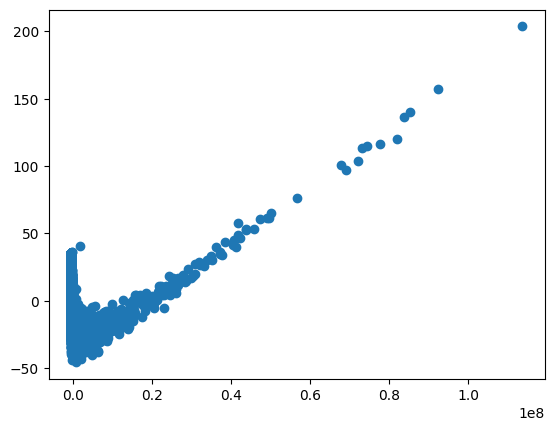

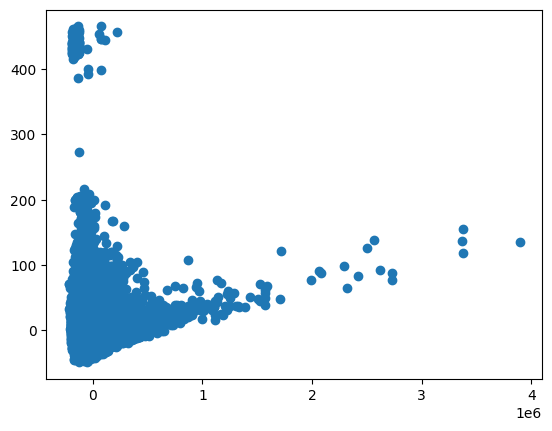

In [62]:
X_tracks = pd.read_csv('./dataset_preprocessed/tabular/no_outliers_tracks.csv')
X_artists = pd.read_csv('./dataset_preprocessed/tabular/no_outliers_artists.csv')
X_artists = artists.drop(columns=['id', 'name', 'genres'])
X_tracks = tracks.drop(columns=[
    'id',
    'name',
    'disc_number',
    'explicit',
    'artists',
    'album_type',
    'album_name',
    'album_release_date',
    'album_release_date_precision',
    'key',
    'mode',
    'time_signature',
    'genre'
])
pca = PCA(n_components=2)
pca_data = pd.DataFrame(pca.fit_transform(X_artists), columns=['PC1', 'PC2'])

fig = plt.figure()
ax = fig.add_subplot()

scatter = ax.scatter(pca_data['PC1'],
                     pca_data['PC2'])

plt.show()
pca = PCA(n_components=2)
pca_data = pd.DataFrame(pca.fit_transform(X_tracks), columns=['PC1', 'PC2'])

fig = plt.figure()
ax = fig.add_subplot()

scatter = ax.scatter(pca_data['PC1'],
                     pca_data['PC2'])

plt.show()